# Importando as bibliotecas

In [517]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore') #ignora os avisos


# Aula 01: Entendendo a série temporal

## Coleta de dados e primeiras análises

Nesse módulo, vamos trabalhar com dados sobre covid no estado de São Paulo. Os dados foram extraídos do [site do governo de São Paulo](https://www.seade.gov.br/coronavirus/). O arquivo csv gerado também está disponibilizado no [repositório do Github desse projeto](https://github.com/renanmath/Alura_Bootcamp_Data_Science/tree/main/M%C3%B3dulo%2003).  

In [518]:
url = 'https://github.com/renanmath/Alura_Bootcamp_Data_Science/raw/main/M%C3%B3dulo%2003/dados_covid_sp.zip'


In [519]:
dados = pd.read_csv(url, sep = ';')
dados

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286173,Ignorado,9999999,8,5,2021-05-08,820,116,"0,000000e+00","10,0000000",5,3,"0,000000e+00","-0,4285714","0,0060975610",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",18
286174,Ignorado,9999999,9,5,2021-05-09,756,-64,"0,000000e+00","7,8571429",16,11,"0,000000e+00","1,0000000","0,0211640212",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19
286175,Ignorado,9999999,10,5,2021-05-10,703,-53,"0,000000e+00","3,8571429",9,-7,"0,000000e+00","0,2857143","0,0128022760",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19
286176,Ignorado,9999999,11,5,2021-05-11,744,41,"0,000000e+00","4,4285714",3,-6,"0,000000e+00","-0,1428571","0,0040322581",NaN,0,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19


Como o objetivo desse módulo é trabalhar com séries temporais, é interessante termos uma coluna em nosso dataframe que sirva de parâmetro de tempo. Essa coluna é a 'datahora', porém ela está em formato de string e o python são saberá interpretar corretamente. Devemos converter para um formato datetime:

In [520]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format= '%Y-%m-%d')

Agora podemos plotar um gráfico inicial dos casos (acumulados) de covid:

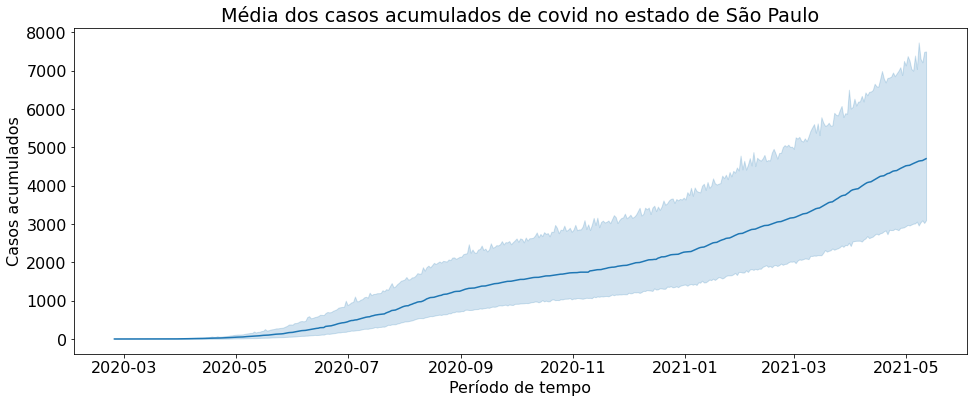

In [521]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(data = dados,x = 'datahora', y = 'casos')
plt.title('Média dos casos acumulados de covid no estado de São Paulo')
plt.ylabel('Casos acumulados')
plt.xlabel('Período de tempo')
plt.show()

A visualização não está tão boa, pois plotamos um gráfico com informações de todos os municípios. Na sequência, vamos escolher um único município e focar a análise nele. Antes porém, observe que a curva parece ter um crescimento exponencial, isto é, o gráfico de uma função do tipo $f(x) = a^x$. Vamos plotar um gráfico desse tipo:

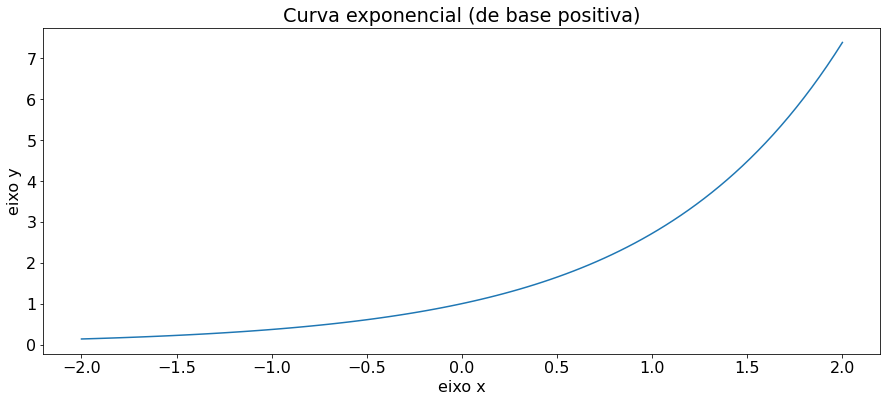

In [522]:
eixo_x = np.linspace(-2,2,100)
y_exp = np.exp(eixo_x)

ax = sns.lineplot(x = eixo_x, y = y_exp)
plt.title('Curva exponencial (de base positiva)')
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.show()

Um recurso visual muito utilizado é mudar a escala do eixo y para uma escala logarítmica. Por exemplo, se temos uma escala logarítmica de base 10, um incremento de uma unidade na escala corresponde, na verdade, a multiplicar os valores por 10. 

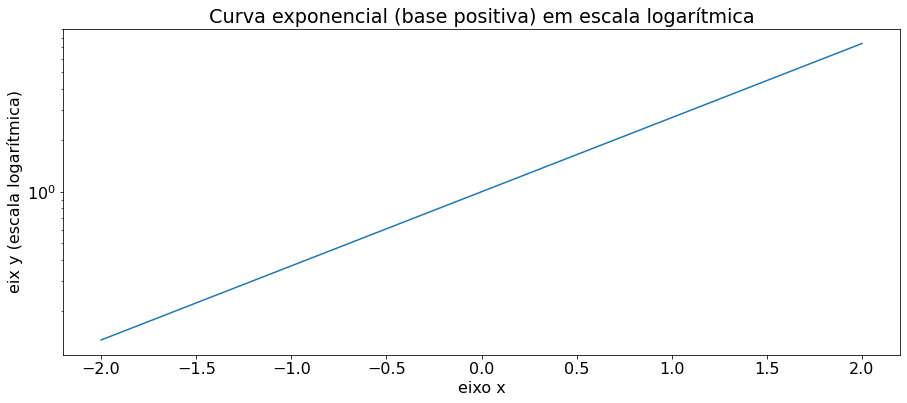

In [523]:
ax = sns.lineplot(x = eixo_x, y = y_exp)
plt.yscale('log')
plt.title('Curva exponencial (base positiva) em escala logarítmica')
plt.xlabel('eixo x')
plt.ylabel('eix y (escala logarítmica)')
plt.show()

Vamos agora focar os estudos apenas no município de São Paulo. Para isso vamos salvar os dados filtrados em um novo dataframe:

In [524]:
dados_sp = dados.query('nome_munic == "São Paulo"')
dados_sp

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,178,"2,384988e+02","114,5714286","0,0385126596",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,38,"2,388190e+02","116,7142857","0,0384970571",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,17,"2,389622e+02","114,1428571","0,0384920204",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,219,"2,408072e+02","120,0000000","0,0386350212",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19


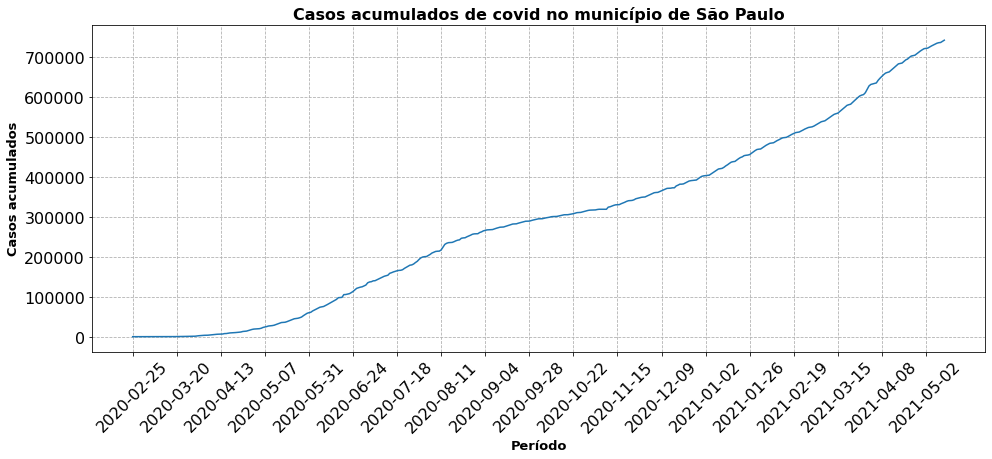

In [525]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x = 'datahora', y = 'casos', data = dados_sp)
plt.title('Casos acumulados de covid no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Casos acumulados', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=24,offset=0))
plt.show()

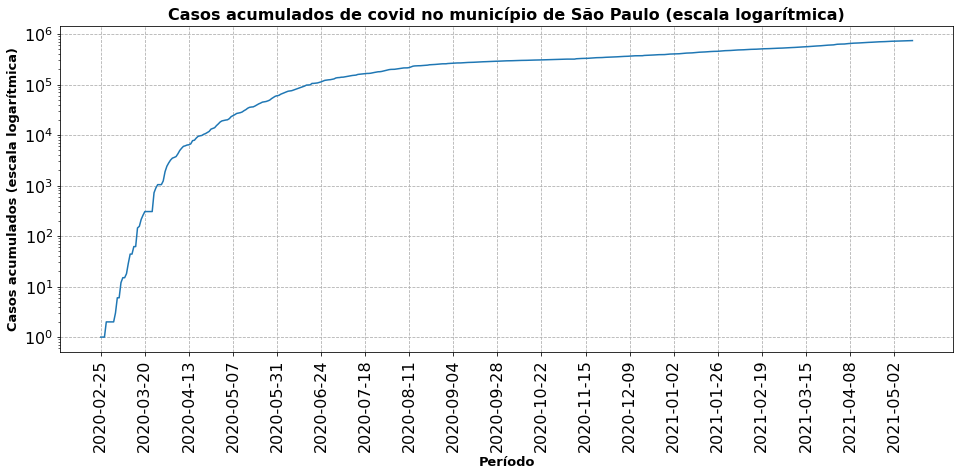

In [526]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x = 'datahora', y = 'casos', data = dados_sp)
plt.yscale('log')
plt.title('Casos acumulados de covid no município de São Paulo (escala logarítmica)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Casos acumulados (escala logarítmica)', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=24,offset=0))
plt.show()


Percebemos então que no começo da pandemia, a curva de fato teve um crescimento exponencial bem acentuado, até aproximadamento o mês de Abril. Depois a taxa de crescimento caiu, mas ainda continuou sendo um crescimento exponencial.

Façamos a mesma análise para o município de Campinas:

In [527]:
dados_campinas = dados.query('nome_munic == "Campinas"')
dados_campinas

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
108,Campinas,3509502,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
753,Campinas,3509502,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
1398,Campinas,3509502,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
2043,Campinas,3509502,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
2688,Campinas,3509502,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282618,Campinas,3509502,8,5,2021-05-08,79101,277,"6,729131e+03","277,1428571",3129,19,"2,661844e+02","13,5714286","0,0395570220",RA de Campinas,4,Campinas,3,1175501,192796,79457,>5000,1.0,"-22,9053","-47,0659",18
283263,Campinas,3509502,9,5,2021-05-09,79146,45,"6,732959e+03","277,2857143",3129,0,"2,661844e+02","12,8571429","0,0395345311",RA de Campinas,4,Campinas,3,1175501,192796,79457,>5000,1.0,"-22,9053","-47,0659",19
283908,Campinas,3509502,10,5,2021-05-10,79166,20,"6,734660e+03","276,7142857",3129,0,"2,661844e+02","12,7142857","0,0395245434",RA de Campinas,4,Campinas,3,1175501,192796,79457,>5000,1.0,"-22,9053","-47,0659",19
284553,Campinas,3509502,11,5,2021-05-11,79468,302,"6,760352e+03","258,0000000",3160,31,"2,688215e+02","14,7142857","0,0397644335",RA de Campinas,4,Campinas,3,1175501,192796,79457,>5000,1.0,"-22,9053","-47,0659",19


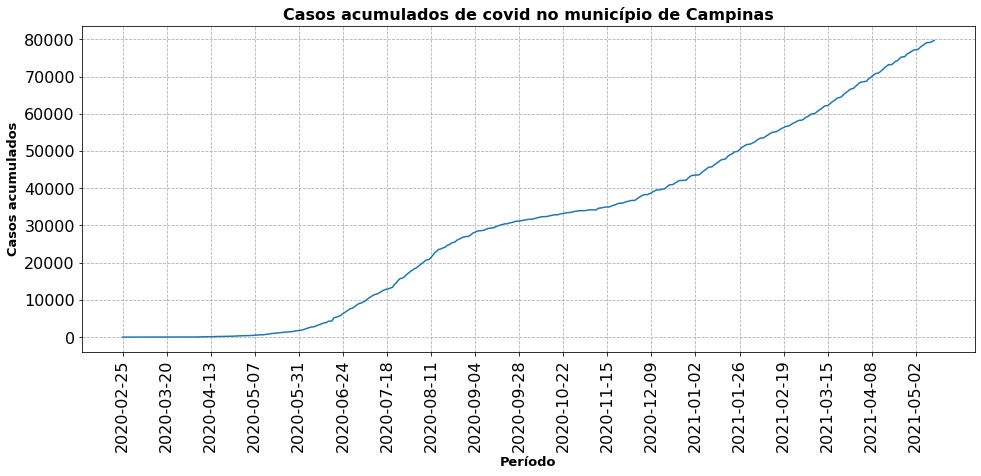

In [528]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x = 'datahora', y = 'casos', data = dados_campinas)
plt.title('Casos acumulados de covid no município de Campinas', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Casos acumulados', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=24,offset=0))
plt.show()

Agora em escala logarítimica:

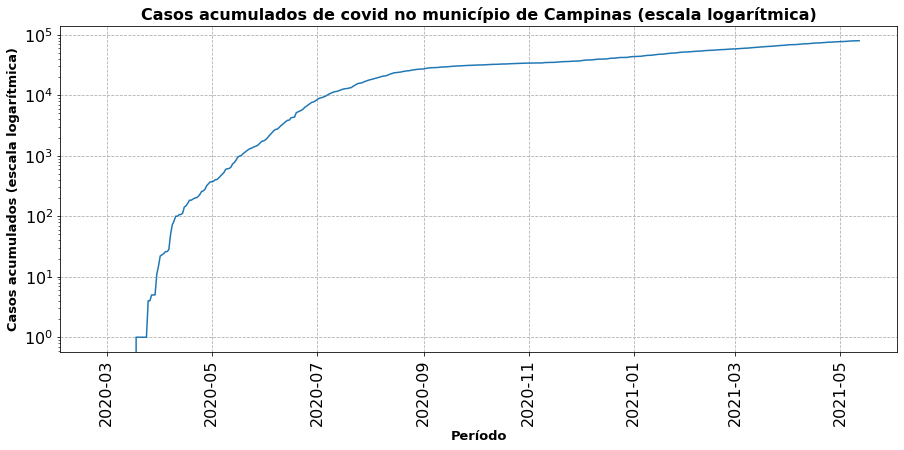

In [529]:
sns.lineplot(x = 'datahora', y = 'casos', data = dados_campinas)
plt.yscale('log')
plt.title('Casos acumulados de covid no município de Campinas (escala logarítmica)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Casos acumulados (escala logarítmica)', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=24,offset=0))
plt.show()


 Observamos um comportamento semelhante ao do município de São Paulo, mas com um certo atraso. 

## Taxa de crescimento e média móvel

## Taxa de crescimento

Vejamos os dados agora por casos novos diários.

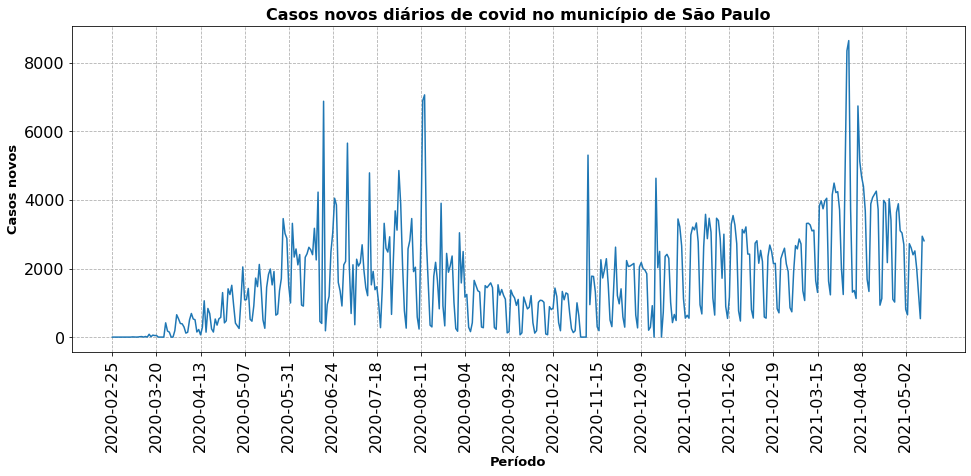

In [530]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp)
plt.title('Casos novos diários de covid no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Casos novos', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=24,offset=0))
plt.show()

Observamos já de pronto uma certa periodicidade (sazonalidade) no número de casos novos. 

O que faremos a seguir é usar o método diff() para calcular a diferença discreta entre os dados. Isso é uma maneira de medir a *taxa de variação* entre os valores. No caso, a taxa de variação com respeito ao tempo. 

Uma analogia é tentar comparar com o conceito de *velocidade média*, que é uma métrica que mensura o quão rápido realizamos um deslocamento em um período de tempo determinado. A fórmula é:

$v_m = \frac{\mbox{posicao final} - \mbox{posicao inicial}}{\mbox{instante final}- \mbox{intante inicial}} = \frac{\mbox{variacao da posicao}}{\mbox{variacao do tempo}}$ 

A velocidade média é simplesmente a taxa de variaçao do deslocamento em relação ao tempo. Do mesmo modo, podemos calcular a taxa de variação de casos novos em relação ao tempo:

$\mbox{taxa de crescimento de casos novos} = \frac{\mbox{variacao do numero de casos novos}}{\mbox{variacao da janela de tempo}}  $

Como em  geral vamos sempre tomar a variação da janela de tempo como sendo 1 dia (isto é, estamos interessado no quanto a variável se comportou de um dia para o outro), então a taxa de variação fica:

$\mbox{taxa de crescimento de casos novos} = \mbox{variacao do numero de casos novos} $

De modo que variação e taxa de variação, nesse contexto, são a mesma métrica. 

Vejamos isso na prática:

In [531]:
dados_sp['taxa_crescimento_casos_novos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

In [532]:
dados_sp

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_crescimento_casos_novos,taxa_crescimento_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,178,"2,384988e+02","114,5714286","0,0385126596",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18,-515.0,35.0
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,38,"2,388190e+02","116,7142857","0,0384970571",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-713.0,-140.0
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,17,"2,389622e+02","114,1428571","0,0384920204",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-747.0,-21.0
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,219,"2,408072e+02","120,0000000","0,0386350212",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,2403.0,202.0


Vamos plotar os gráficos correspondentes:

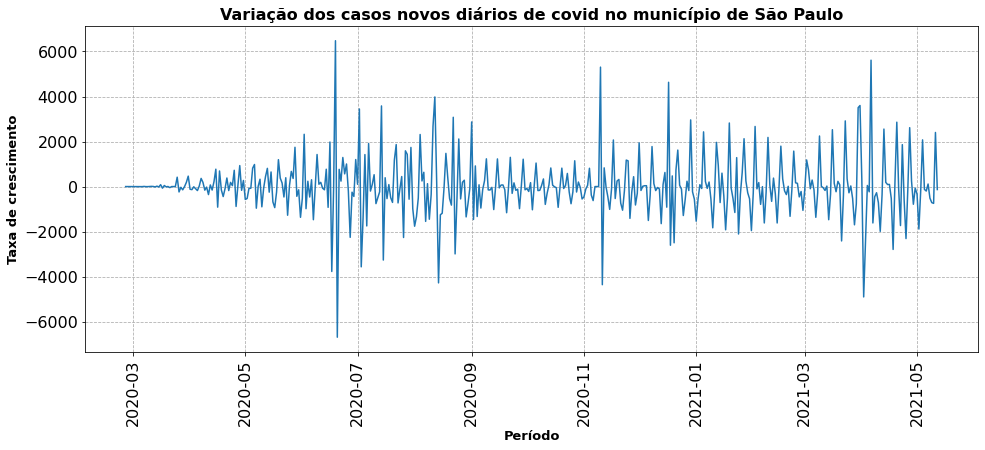

In [533]:
plt.figure(figsize=(16,6))
sns.lineplot(x = 'datahora', y = 'taxa_crescimento_casos_novos', data = dados_sp)
plt.title('Variação dos casos novos diários de covid no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=24,offset=0))
plt.show()

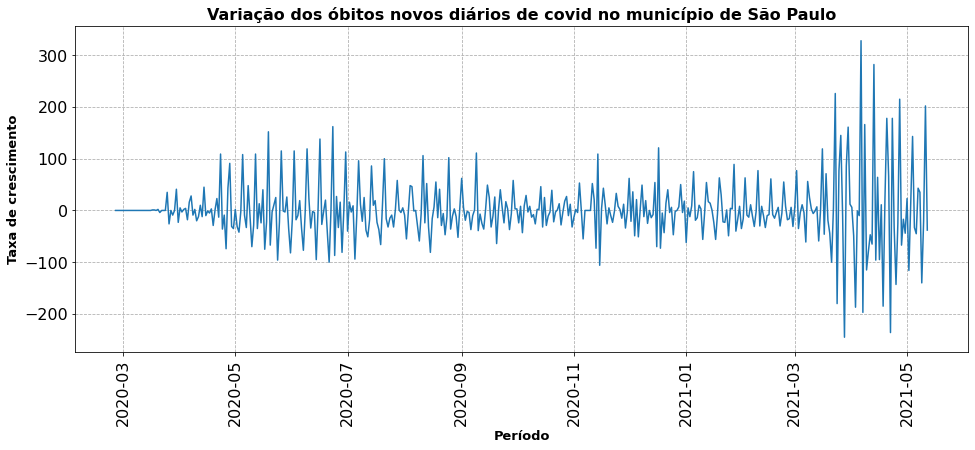

In [534]:
plt.figure(figsize=(16,6))
sns.lineplot(x = 'datahora', y = 'taxa_crescimento_obitos', data = dados_sp)
plt.title('Variação dos óbitos novos diários de covid no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=24,offset=0))
plt.show()

Não me parece que os gráficos das variações dos casos e óbitos novos trazem algum insight interessante, embora os gráficos sejam bonitos. 

Mais interessante, porém, é visualizar a taxa de variação dos casos e óbitos acumulados, *com uma variação de tempo de 28 dias*: ou seja, observar como está sendo o crescimento do número de casos a cada mês (4 semanas). Em outras palavras, para cada dia estamos calculando o quanto o número de casos variou em comparação com o cenário de 28 dias atrás. 

In [535]:
dados_sp['taxa_crescimento_casos_acumulados'] = dados_sp['casos'].diff(periods = 28)
dados_sp['taxa_crescimento_obitos_acumulados'] = dados_sp['obitos'].diff(periods = 28)

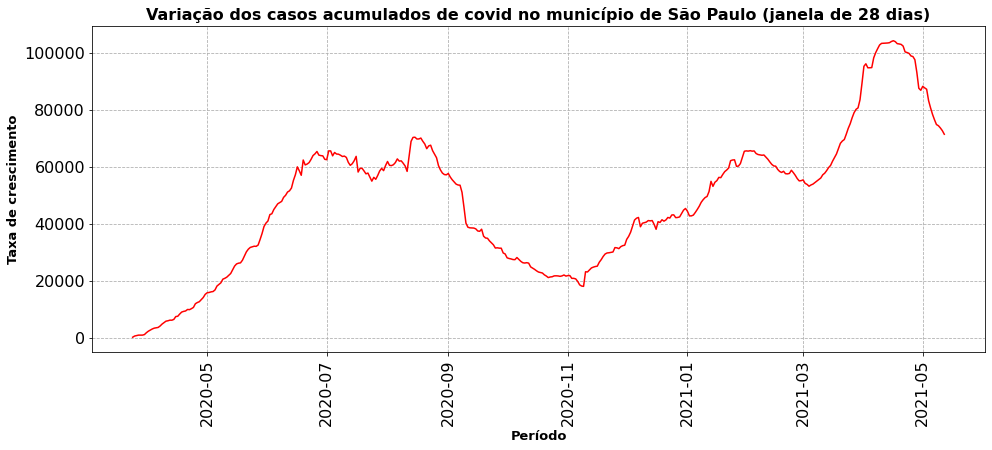

In [536]:
plt.figure(figsize=(16,6))
sns.lineplot(x = 'datahora', y = 'taxa_crescimento_casos_acumulados', data = dados_sp, color = 'r')
plt.title('Variação dos casos acumulados de covid no município de São Paulo (janela de 28 dias)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=24,offset=0))
plt.show()

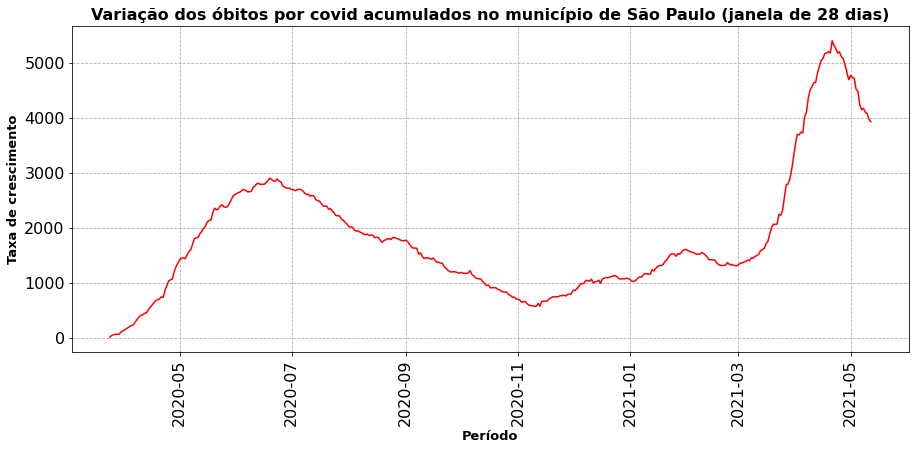

In [537]:
sns.lineplot(x = 'datahora', y = 'taxa_crescimento_obitos_acumulados', data = dados_sp, color = 'r')
plt.title('Variação dos óbitos por covid acumulados no município de São Paulo (janela de 28 dias)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

Observamos que com uma janela de tempo maior os gráficos são mais suaves e fica mais fácil observar os movimentos de tendência. 
Assim, no começo da pandemia, observamos um crescimento acentuado do número de casos, que atingiu seu pico em por volta de agosto, estabilizou, sofreu uma queda a partir de setembro e manteve essa tendência de queda até novembro, quando então inicou um movimento ascendente, atingindo seu ápice a pouco mais de um mês. Análise bem similar para o número de óbitos acumulados. 

Em resumo, não apenas o número de casos e de óbitos está crescendo, como a velocidade com que esses números aumentam está também crescendo. 

### Picos de taxa de  novos casos coincide com picos de taxa de óbitos?

Antes de de fato resolvermos esse problema, devemos responder de formar precisa a seguinte pergunta:

**O que caracteriza um pico?**

Ou seja, antes de querer comparar os picos dessas duas séries temporais e verificar se elas coincidem, devemos ter uma definição exata do que é ser um pico.

Para efeitos práticos, adotaremos a seguinte definição:

```` 
Diremos que ocorreu um pico no dia x se o valor no dia x for maior que 110% do  percentil 75 dos valores dos 7 dias anteriores e dos 7 dias seguintes.
```` 

Em termos matemáticos, se denotarmos por $v(x) $ o valor no dia $x$, então ocorre um pico em $x$ se:

$ v(x) > 1.1 \times \mbox{percentil 75 de }\{ v(x-7), \dots, v(x-1), v(x+1), \dots, v(x+7) \}$

Com essa definição, garantimos que teremos picos quando o valor superar muito os valores em sua vizinhança.Isso não é uma definição padrão, é apenas um conceito que idealizei para tentar resolver esse desafio.

O que faremos é criar para cada variável desejada um nova coluna que contém 1 se houve pico naquele dia e 0 se não houve pico. Depois vamos comparar as duas colunas e verificar se os picos ocorreram em pontos simultâneos.
Para automatizar o processo, vamos criar uma função que recebe uma lista de valores e retorna uma lista de 0's e 1's, caso não haja ou haja pico.

A função terá parâmetros ajustáveis, para possamos simular diferentes cenários de picos. Os parâmetros serão:

- margem ----> número de dias antes e depois que serão considerados no cálculo do percentil 75. O balor padrão será 7.
- tolerância ---> o quanto exigimos que o pico seja maior (percentualmente) que os valores vizinhos. O valor padrão será 1.1 (ou seja, 110%).

In [538]:
def picos(serie_temporal, tolerancia = 1.1, margem = 7):
  serie = serie_temporal.copy()
  lista_picos = []
  tam = len(serie)

  for i in range(0,tam):
    if i > 0:
      linf = max([0,i-margem+1])
      lsup = min([tam, i+margem+1])
      lista_aux = serie[linf: i] + serie[i+1:lsup]
    else:
      lsup = min([tam, i+margem+1])
      lista_aux = serie[i+1:lsup]    

    
    perc = np.percentile(lista_aux, 75)
    
    if serie[i] > tolerancia * perc:
      lista_picos.append(1)
    else:
      lista_picos.append(0)

  
  return lista_picos

Agora que temos a função, podemos plotar um gráfico dos casos novos diários, destacando os picos, de acordo com a função. Vamos armazenar esses picos em uma nova coluna.

In [539]:
dados_sp['picos_casos'] = picos(dados_sp['casos_novos'].tolist(), margem=7)

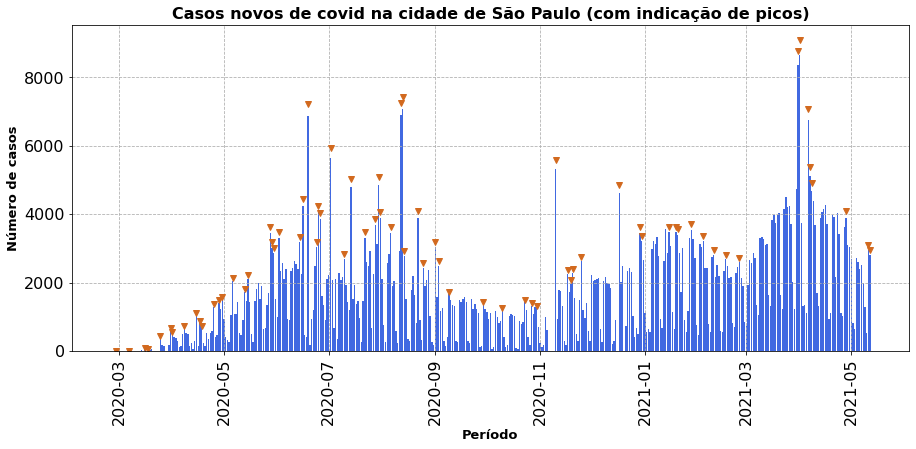

In [540]:
plt.bar(dados_sp['datahora'], dados_sp['casos_novos'], color = 'royalblue')
plt.plot(dados_sp['datahora'], 1.05*dados_sp['casos_novos']*dados_sp[dados_sp['picos_casos'] > 0]['picos_casos'], 'v', color = 'chocolate')
plt.title('Casos novos de covid na cidade de São Paulo (com indicação de picos)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Número de casos', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

Agora vamos comparar os picos dos casos novos com os óbitos novos

In [541]:
dados_sp['picos_casos'] = picos(dados_sp['casos_novos'].tolist(), margem=7)
dados_sp['picos_obitos'] = picos(dados_sp['obitos_novos'].tolist(), margem=7)
dados_sp['picos_simultaneos'] = dados_sp['picos_casos'] * dados_sp['picos_obitos']

In [542]:
plt.bar(dados_sp['datahora'], dados_sp['obitos_novos'], color = 'salmon')
plt.plot(dados_sp['datahora'], 1.05*dados_sp['obitos_novos']*dados_sp[dados_sp['picos_obitos'] > 0]['picos_obitos'], 'v', color = 'chocolate')
plt.title('Novos obitos por covid na cidade de São Paulo (com indicação de picos)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Número de óbitos', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

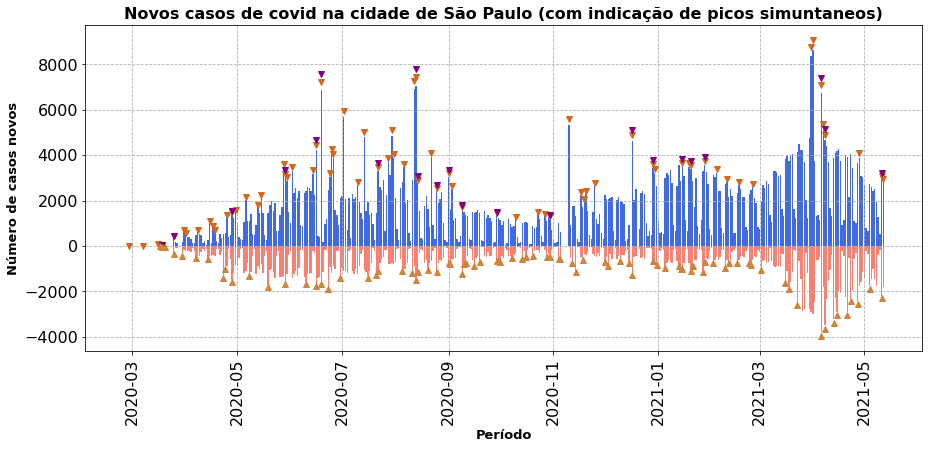

In [543]:
plt.bar(dados_sp['datahora'], dados_sp['casos_novos'], color = 'royalblue')
plt.plot(dados_sp['datahora'], 1.05*dados_sp['casos_novos']*dados_sp[dados_sp['picos_casos'] > 0]['picos_casos'], 'v', color = 'chocolate')
plt.plot(dados_sp['datahora'], 1.1*dados_sp['casos_novos']*dados_sp[dados_sp['picos_simultaneos'] > 0]['picos_simultaneos'], 'v', color = 'purple')
plt.plot(dados_sp['datahora'], -1.05*10*dados_sp['obitos_novos']*dados_sp[dados_sp['picos_obitos'] > 0]['picos_obitos'], '^', color = 'peru')
plt.bar(dados_sp['datahora'], -10*dados_sp['obitos_novos'], color = 'salmon')
plt.title('Novos casos de covid na cidade de São Paulo (com indicação de picos simuntaneos)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Número de casos novos', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

Mas quando houve picos simultâneos?

In [544]:
print('Tivemos um total de ', dados_sp['picos_casos'].sum(), 'picos de casos novos', 
      dados_sp['picos_obitos'].sum(), 'picos de óbitos novos e ', dados_sp['picos_simultaneos'].sum(), ' picos simuntâneos')
print('A proporção entre o total de picos simuntâneos pelo total de picos de casos é',
      100*dados_sp['picos_simultaneos'].sum()/dados_sp['picos_casos'].sum(), '%')

Tivemos um total de  72 picos de casos novos 82 picos de óbitos novos e  22  picos simuntâneos
A proporção entre o total de picos simuntâneos pelo total de picos de casos é 30.555555555555557 %


### Médias móveis

Médias móveis são estimadores muito usados em análises de séries temporais. A ideia é bem simples: calculamos a média dos valores para um número pré-determinado de períodos, anteriores ao período atual. O nome móvel vem justamente do fato de que o valor da média vai se movendo junto com os períodos. Ela é uma boa métrica, pois suaviza a interterência de valores pontuais fora da curva (outliers). Quanto maior o número de períodos considerado para o cálculo da média móvel, mais suave será seu gráfico. Médias móveis de períodos curtos tendem a andar 'coladas' com o gráfico dos valores e portanto são suceptíveis à volatilidade desses dados. Já médias móveis com um número maior de períodos são mais suaves e menos voláteis. 

Se temos uma série temporal $(x_1,x_2,x_3, \dots, x_n, \dots)$, então a média móvel de $p$ períodos no intante $n$ é dada por:

$MM_n = \frac{x_{n-p+1}+x_{n-p+2}+\dots + x_{n-1}+x_n}{p}$

Essa é na verdade a média móvel aritmética. Há outras médias móveis, como a ponderada e a exponencial.

Em Python, podemos calcular a média móvel (artimética) com o auxílio do método rolling(). Vamos escolher uma janela de 7 dias, ou seja, serão considerados 7 períodos para o cálculo da média móvel, tanto para o número de casos quanto para o número de óbitos.

In [545]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window = 7, center = False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window = 7, center = False).mean()

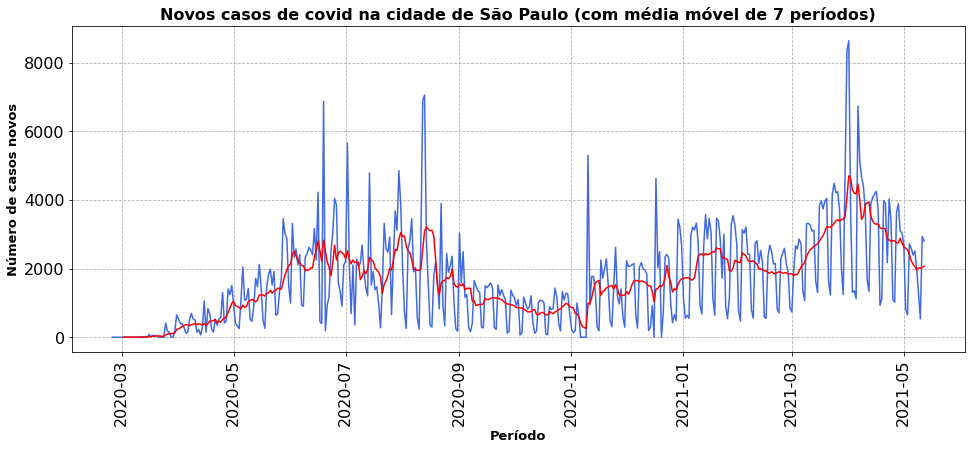

In [546]:
plt.figure(figsize=(16,6))
sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp, color = 'royalblue')
sns.lineplot(x = 'datahora', y = 'media_movel_casos', data = dados_sp, color = 'r')
plt.title('Novos casos de covid na cidade de São Paulo (com média móvel de 7 períodos)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Número de casos novos', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

Observe como o gráfico da média móvel é mais mais suave e menos volátil que o gráfico dos valores absolutos. A média móvel é menos suceptível às sazonalidades, desde que o período entre os eventos sazonais não seja muito maior que o período da média móvel. 
Vejamos agora o gráfico com média móvel dos óbitos:

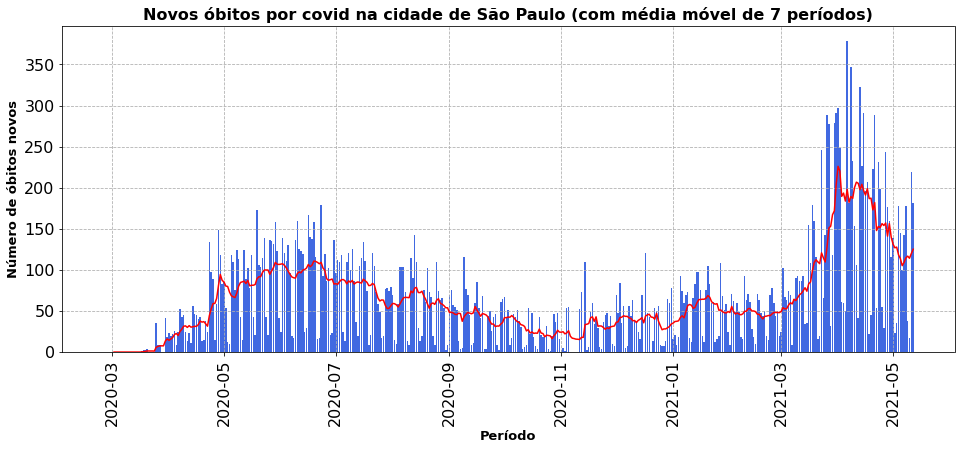

In [547]:
plt.figure(figsize=(16,6))
plt.bar(dados_sp['datahora'], dados_sp['obitos_novos'], color = 'royalblue')
sns.lineplot(x = 'datahora', y = 'media_movel_obitos', data = dados_sp, color = 'r')
plt.title('Novos óbitos por covid na cidade de São Paulo (com média móvel de 7 períodos)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Número de óbitos novos', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.show()

## Correlação e função de autocorrelação

Correlação é uma métrica usada para mensurar o quanto duas variáveis estão relacionadas uma com a outra. Em geral dado por um número entre -1 e 1, temos a seguinte interpretação:

- Correlação positiva ---> as variáveis variam na mesma direção: se uma aumenta, a outra aumenta; se uma diminui, a outra diminue. 
- Correlação negativa ----> as variáveis variam em direções opostas: se uma aumenta, a outra diminue; se uma diminui, a outra aumenta. 
- Correlação perto de zero ----> as variáveis não estão correlacionadas.

Importante observar que correlação não implica casualidade. Isto é, não é porque as variáveis se comportam de forma similar que uma delas é a causa da outra ou vice-versa. Elas podem ser causadas por um terceiro fator não considerado, ou ser apenas uma grande coincidência. Cabe a quem está analizando ponderar sobre isso, caso a caso.

Vejamos a correlação dos casos novos com os óbitos novos:

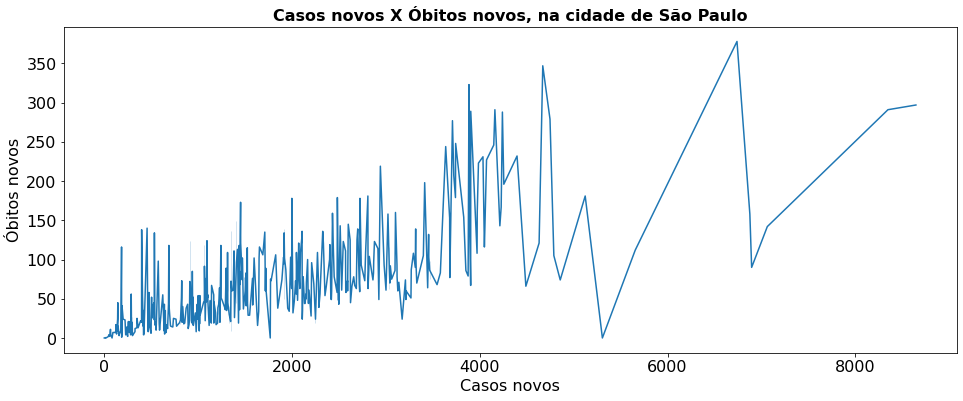

In [548]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x = 'casos_novos', y = 'obitos_novos', data = dados_sp)
plt.title('Casos novos X Óbitos novos, na cidade de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Casos novos')
plt.ylabel('Óbitos novos')
plt.show()

Não parece haver uma relação muito óbvia. Vejamos o valor numérico da correlação:

In [549]:
np.corrcoef(dados_sp['casos_novos'],dados_sp['obitos_novos'])

array([[1.        , 0.73553236],
       [0.73553236, 1.        ]])

In [550]:
np.corrcoef(dados_sp['casos_novos'],dados_sp['obitos_novos'])[0][1]

0.7355323571757685

Apesar de graficamente a relação entre as variáveis parecer bem bagunçada, numericamente elas tem uma corelação até que bem alta, a saber, 0.73. 

### Mover a coluna óbitos para frente ou para trás: correlação cruzada

No entanto, é possível que a correlação entre as variáveis ocorra com atraso. Em nosso caso, é natural esperar que teremos mais óbitos se temos mais casos, porém, os óbitos referentes aos casos registrados num certo dia só ocorrerão em algum momento no futuro. 
Precisamos então medir essa correlação 'atrasada' e para isso temos que deslocar os dados de nossa série temporal.

Vamos agora criar uma função que joga os dados de uma coluna do data frame para frente ou para trás

In [551]:
def deslocar_serie(serie_temporal, janela = 7):
  serie = serie_temporal.copy()
  tam = len(serie)

  serie_deslocada = []

  if janela >= 0: #deslocando para frente ----> olhando para o passado
    for i in range(0, janela):
      serie_deslocada.append(np.nan)

    for i in range(janela, tam):
      serie_deslocada.append(serie[i-janela])

  else:  #deslocando para trás -----> olhando para o futuro
    for i in range(0,tam + janela):
      serie_deslocada.append(serie[i-janela])

    for i in range(tam + janela, tam):
      serie_deslocada.append(np.nan)
  
  return serie_deslocada


Vejamos um exemplo de aplicação:

In [552]:
exemplo = [1,5,7,4,-2,0,10,3,-1,8,12,13,-7]
deslocar_serie(exemplo, janela=3), exemplo

([nan, nan, nan, 1, 5, 7, 4, -2, 0, 10, 3, -1, 8],
 [1, 5, 7, 4, -2, 0, 10, 3, -1, 8, 12, 13, -7])

In [553]:
exemplo = [1,5,7,4,-2,0,10,3,-1,8,12,13,-7]
deslocar_serie(exemplo, janela=-3)

[4, -2, 0, 10, 3, -1, 8, 12, 13, -7, nan, nan, nan]

Vamos aplicar no dataframe dados_sp para deslocar a coluna óbitos para trás em 7, 14, 21, 28 e 35 dias (isto é, estamos olhando para o futuro, 7,14,21,28 e 35 dias a frente).

In [554]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [555]:
dados_sp['obitos_novos_7_futuro'] =  deslocar_serie(serie_temporal = dados_sp['obitos_novos'].tolist(), janela = -7)
dados_sp['obitos_novos_14_futuro'] =  deslocar_serie(serie_temporal = dados_sp['obitos_novos'].tolist(), janela = -14)
dados_sp['obitos_novos_21_futuro'] =  deslocar_serie(serie_temporal = dados_sp['obitos_novos'].tolist(), janela = -21)
dados_sp['obitos_novos_28_futuro'] =  deslocar_serie(serie_temporal = dados_sp['obitos_novos'].tolist(), janela = -28)
dados_sp['obitos_novos_35_futuro'] =  deslocar_serie(serie_temporal = dados_sp['obitos_novos'].tolist(), janela = -35)

Vejamos agora a correlação entre essas variáveis, usando o comando corr() do pandas

In [556]:
dados_sp[['casos_novos', 'obitos_novos', 'obitos_novos_7_futuro','obitos_novos_14_futuro','obitos_novos_21_futuro','obitos_novos_28_futuro','obitos_novos_35_futuro' ]].corr()

,casos_novos,obitos_novos,obitos_novos_7_futuro,obitos_novos_14_futuro,obitos_novos_21_futuro,obitos_novos_28_futuro,obitos_novos_35_futuro
casos_novos,1.000000,0.735532,0.681051,0.644998,0.562852,0.505810,0.428102
obitos_novos,0.735532,1.000000,0.818991,0.750987,0.682405,0.587961,0.502487
obitos_novos_7_futuro,0.681051,0.818991,1.000000,0.815841,0.746557,0.676666,0.581945
obitos_novos_14_futuro,0.644998,0.750987,0.815841,1.000000,0.812470,0.741893,0.672095
obitos_novos_21_futuro,0.562852,0.682405,0.746557,0.812470,1.000000,0.808922,0.738353
obitos_novos_28_futuro,0.505810,0.587961,0.676666,0.741893,0.808922,1.000000,0.806498
obitos_novos_35_futuro,0.428102,0.502487,0.581945,0.672095,0.738353,0.806498,1.000000


Observamos então que quanto mais distante no tempo olhamos os óbitos, menor parece ser é a correlação com os novos casos. 

Façamos uma análise mais fina disso. Vamos criar uma função que retorna uma tabela com as correlações entre todos os  deslocamentos que quisermos.

In [557]:
def tab_corr_cruzada(serie_temporal_1, serie_temporal_2, s_min = 0, s_max = 20):
  serie1 = serie_temporal_1.copy()
  serie2 = serie_temporal_2.copy()

  tabela_corr = pd.DataFrame()
  tabela_series = pd.DataFrame()
  tabela_series['Serie Fixa'] = serie1
  

  for shift in range(s_min,s_max+1):
    tabela_series['Shift = '+ str(shift)] = deslocar_serie(serie2, janela = -shift)
    
    
  correlacoes = tabela_series.corr()
  
  tabela_corr['Correlações'] = correlacoes.iloc[0,1:]
  

  return tabela_corr

In [558]:
tab_corr_cruzada(dados_sp['casos_novos'].tolist(), dados_sp['obitos_novos'].tolist(), -10,35)

,Correlações
Shift = -10,0.193335
Shift = -9,0.275324
Shift = -8,0.467200
Shift = -7,0.617790
Shift = -6,0.464270
Shift = -5,0.297109
Shift = -4,0.210985
Shift = -3,0.207967
Shift = -2,0.300468
Shift = -1,0.521420


Vejamos as maiores correlações cruzadas.

In [559]:
corr_casos_obitos = tab_corr_cruzada(dados_sp['casos_novos'].tolist(), dados_sp['obitos_novos'].tolist(), -21,35)


In [560]:
corr_casos_obitos.sort_values(by = 'Correlações', ascending= False)

,Correlações
Shift = 0,0.735532
Shift = 7,0.681051
Shift = 14,0.644998
Shift = -7,0.617790
Shift = -14,0.597375
Shift = 21,0.562852
Shift = -21,0.548311
Shift = -1,0.521420
Shift = 6,0.509140
Shift = 28,0.505810


Concluímos então que a correlação máxima ocorre quando a série dos óbitos não está deslocada, indo um pouco na contra-mão da hipótese implícita que fizemos acima. Sendo mais preciso: esperávamos que a série dos casos novos tivesse uma correlação mais alta com a série dos óbitos atrasada, olhando os casos alguns dias no futuro, mas não foi o constatato. Ainda assim, o deslocamento de 7 e 14 dias figuram na segunda e terceira posição no ranking de maiores correlações cruzadas. Na verdade, observa-se que as sete primeiras posições no ranking são todas com deslocamento com múltiplo de 7, o que corrobora com o fato já observado de que há uma sazonalidade dos dados, e essa sazonalidade parece ser semanal.

Vejamos isso em um gráfico:

<Figure size 1152x432 with 0 Axes>

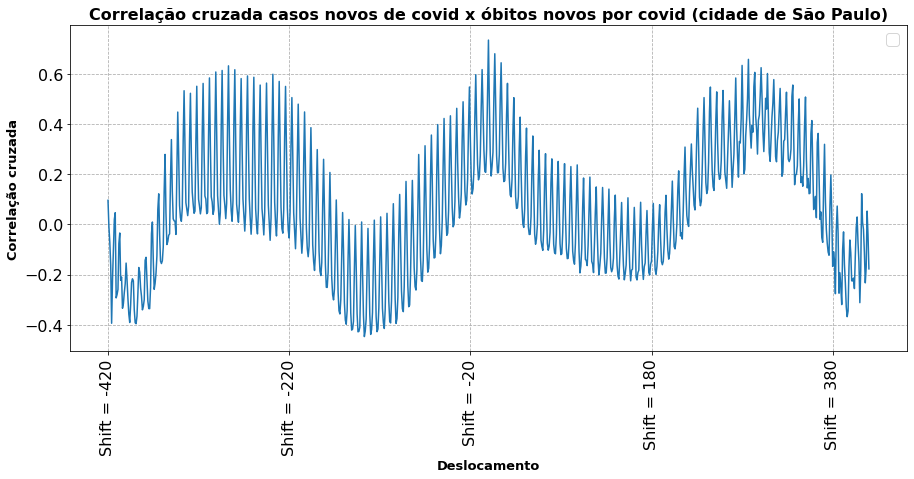

In [561]:
plt.figure(figsize=(16,6))
ax = tab_corr_cruzada(dados_sp['casos_novos'].tolist(), dados_sp['obitos_novos'].tolist(), -420,420).plot()
plt.title('Correlação cruzada casos novos de covid x óbitos novos por covid (cidade de São Paulo)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Deslocamento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Correlação cruzada', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
plt.legend('')
plt.show()

### Função de autocorrelação

O que fizemos na sessão anterior, a saber, calcular as correlações de uma série temporal com os deslocamentos de uma segunda série temporal, pode ser aplicado quando as duas séries são iguais. Obtemos assim o que chamamos de *autocorrelação*, a correlação da série com seus próprios deslocamentos.  Façamos isso e plotemos um gráfico:

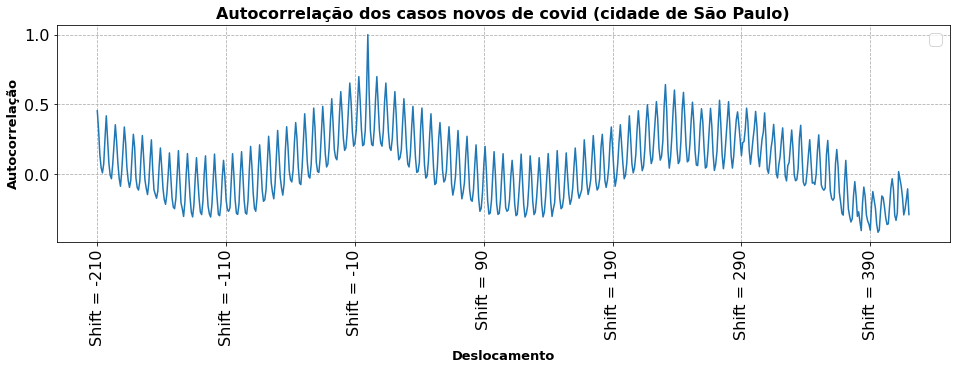

In [562]:
tab_corr_cruzada(dados_sp['casos_novos'].tolist(), dados_sp['casos_novos'].tolist(), -210,420).plot(figsize = (16,4))
plt.title('Autocorrelação dos casos novos de covid (cidade de São Paulo)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Deslocamento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Autocorrelação', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xticks(rotation = 90)
plt.grid(linestyle = '--')
plt.legend('')
plt.show()

Porém o próprio pandas possui um método que faz isso, de forma mais bonita:

In [563]:
from pandas.plotting import autocorrelation_plot

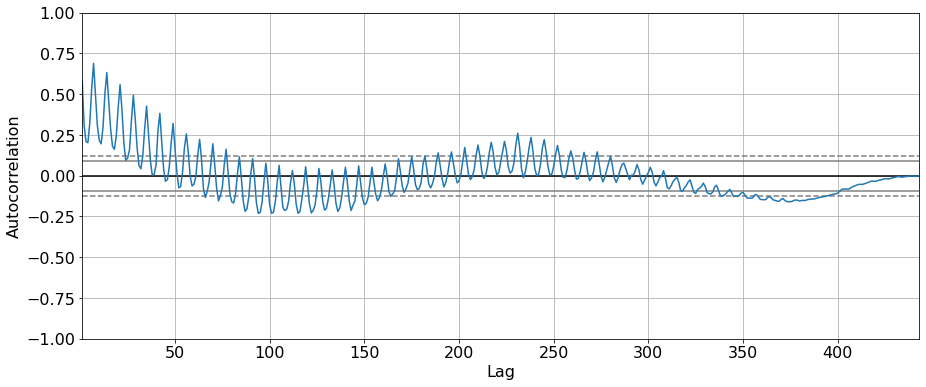

In [564]:
autocorrelation_plot(dados_sp['casos_novos'])
plt.show()

Vejamos essa função com dados aleatórios:

In [565]:
dados_sp.shape

(443, 40)

In [566]:
aleatorio = np.random.rand(443)

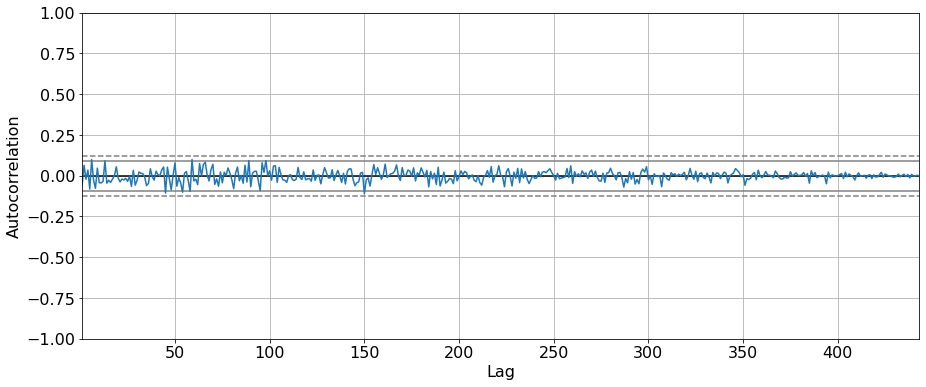

In [567]:
autocorrelation_plot(aleatorio)